In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dFrame=pd.read_csv('Zomato_DataSet.csv')

In [22]:
dFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [23]:
#First we need to convert rating into float values to perform operations
def handleRate(val):
    val=str(val).split('/')
    val=val[0]
    return float(val)

In [24]:
dFrame['rate']=dFrame['rate'].apply(handleRate)
dFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [25]:
dFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


1. What type of restaurants do the majority of customers order from?

Text(0.5, 0, 'Type of Restaurant')

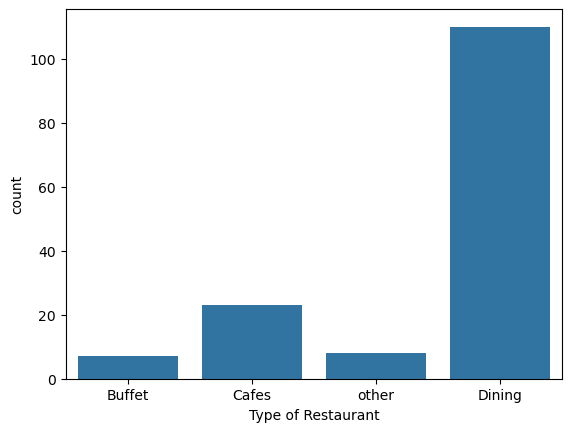

In [33]:
sns.countplot(x=dFrame['listed_in(type)'])
plt.xlabel("Type of Restaurant")

2. How many votes has each type of restaurant recieved from customers?

In [43]:
merged_data=dFrame.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'Votes':merged_data})
result

,Votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

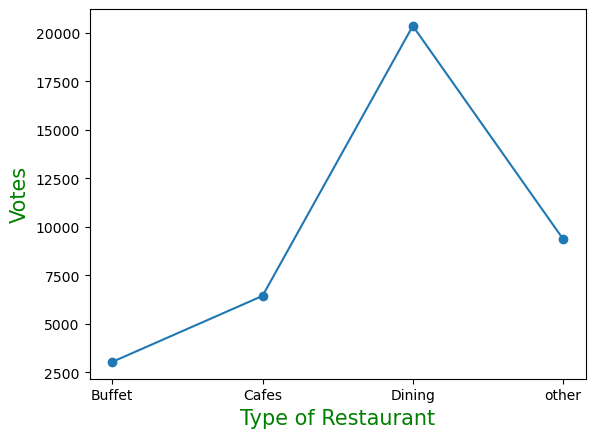

In [50]:
plt.plot(result,marker='o')
plt.xlabel("Type of Restaurant",c="green",size='15')
plt.ylabel("Votes",c="green",size='15')

3. What are the ratings that majority of restaurants have recieved?

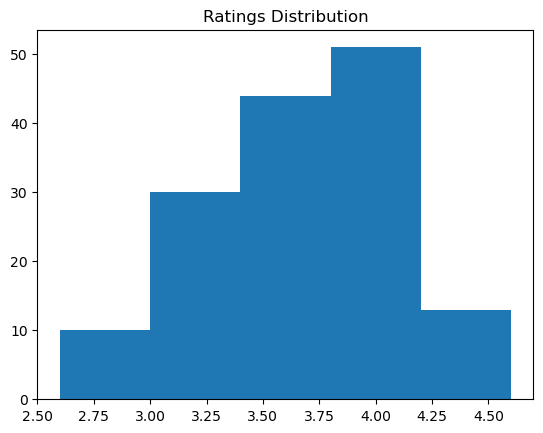

In [53]:
plt.hist(dFrame['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

4. Average spendings of couples on each order who order food online

In [79]:
data=dFrame[dFrame['online_order']=='Yes']
avg_spending=round(np.average(data['approx_cost(for two people)']),2)
print("Average spendings of couples ordering food via online is :",avg_spending)

Average spendings of couples ordering food via online is : 510.34


5. Which mode has recieved maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

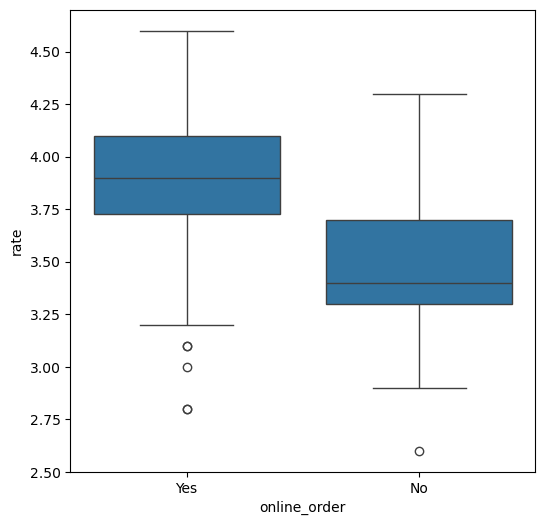

In [83]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dFrame)

From the above graph, we can conclude that the online orders recieved higher ratings in comparision to offline orders.

6. Which type of restaurant recieved more offline orders, so that Zomato can provide those customers with some good offers?

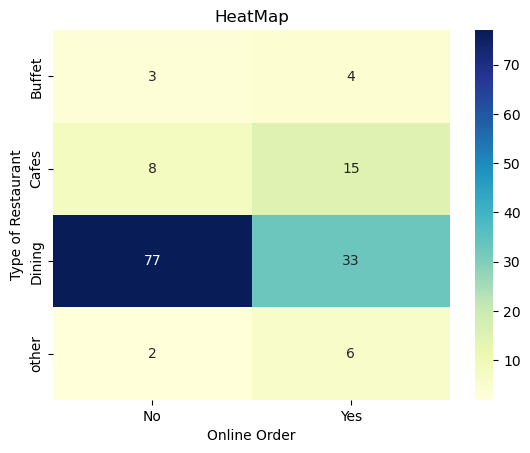

In [97]:
pivotTable=dFrame.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivotTable,annot=True,cmap='YlGnBu',fmt='d')
plt.title("HeatMap")
plt.xlabel("Online Order")
plt.ylabel("Type of Restaurant")
plt.show()

From the above graph, we can see that Dining restaurants are accepting more offline orders. This can be due to customers preferring to place orders in person at restaurants.